# Few steps with keras

This notebook is divided into below 4 section:
1. Introduction
2. Data read, preparation and explore
3. RandomForest GridSearch
4. Model test on validation set
5. Result Submission


# 1. Introduction

This is the simplest demonstration of keras model using tensorflow as backend. 
I achieved accuracy of 97% which is not very great but its still descent. Moreover the model is built with default options so it still have scope for improvement. 

Initially, my accuracy was not that good and it did not improved beyond 85% despite multiple epochs. Then I tried with below options and accuracy improved to current levels.

1. Hot-encoding the labels. 

2. Scaling X variables. 

3. Trying different optimisers

4. Increasing epochs


Data used from kaggle competition link: https://www.kaggle.com/c/digit-recognizer/

### Import libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# model libraries
from sklearn.model_selection import train_test_split
import tensorflow
import keras
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import KFold
#from sklearn.model_selection import GridSearchCV

# model accuracy check
from sklearn import metrics

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns


Using TensorFlow backend.


# 2. Data read, preparation and explore

### Read data files

In [2]:
# read the data
dir = '.\\data\\digit-recognizer\\'
train_file = 'train.csv'
test_file = 'test.csv'

df_train = pd.read_csv(dir + train_file)
df_test = pd.read_csv(dir + test_file)


### Basic data check

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(42000, 785)

Each digit image is of 28x28 size which is total of 784 pixels. These pixel values are stored in columns pixel0....pixel785 (independent variable) for a digit. 
Column label contains the corresponding digit (dependent variable).

In [5]:
# columns pixel0....pixel785 are independent variable of a digit
# column label contains the digit (dependent variable)

df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

Test data set contains 784 pixel values for a digit. It does not contain the label.

Need to indentify the digit based on the 784 pixels. 

In [6]:
df_test.shape

(28000, 784)

In [7]:
df_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

### Explore Train Dataset

In [8]:
# no null values in train dataset

df_train.isnull().values.any()

False

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


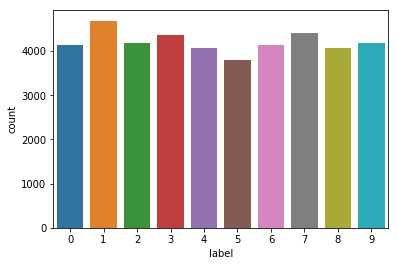

In [10]:
# print the frequency of each label

print(df_train['label'].value_counts())
sns.countplot(df_train['label'])

From train set, display few initial images and corresponding labels:

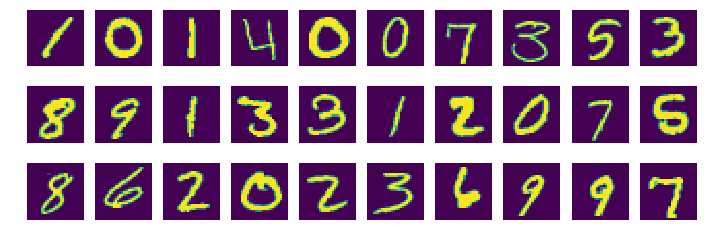

[1, 0, 1, 4, 0, 0, 7, 3, 5, 3]
[8, 9, 1, 3, 3, 1, 2, 0, 7, 5]
[8, 6, 2, 0, 2, 3, 6, 9, 9, 7]


In [11]:
plt.figure(figsize=(12,4))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(df_train.drop(['label'],axis=1).values[i].reshape(28,28) )
    plt.axis('off')
plt.show()

# print corresponding labels:
print(list(df_train['label'].loc[0:9]))
print(list(df_train['label'].loc[10:19]))
print(list(df_train['label'].loc[20:29]))

From test, display few initial images. Need to predict the lable for these. 

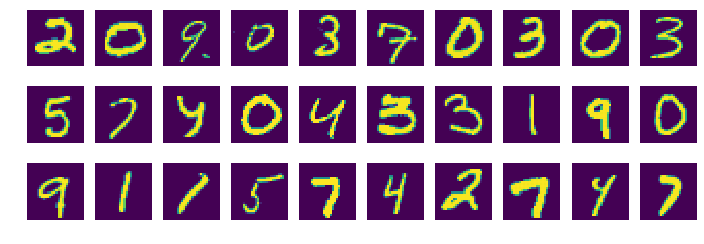

In [12]:
plt.figure(figsize=(12,4))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(df_test.values[i].reshape(28,28) )
    plt.axis('off')
plt.show()

# 3. keras model building

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. 

Being able to go from idea to result with the least possible delay is key to doing good research.


### Perform train-test split

Train data set is divided in 80:20 ratio for train/test


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['label'],axis=1),
                                                   df_train['label'],
                                                   test_size = 0.3,
                                                   random_state=39)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [15]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y_train.head()

7956     5
24975    0
15389    9
34581    5
13928    5
Name: label, dtype: int64

### keras Model



In [17]:
# y_train = keras.utils.to_categorical(y_train)
# y_test = keras.utils.to_categorical(y_test)

n_cols = X_train.shape[1]
print("Number of input columns: {0}".format(n_cols))

n_features = len(y_train.unique())
print("Number of output features: {0}".format(n_features))


Number of input columns: 784
Number of output features: 10


In [18]:
# let's convert labels to categorical variable
y_train = keras.utils.to_categorical(y_train, n_features)
y_test = keras.utils.to_categorical(y_test, n_features)

In [19]:
y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32))

In [20]:
# Let's do the same with X variables. 
# data has pixels with max values of 255. So will divide values with 255 to scale the data
X_train = X_train / 255
X_test = X_test / 255

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import SGD

m = Sequential()
m.add(Dense(512,activation='relu',input_shape=(n_cols,)))
m.add(Dropout(0.2))
m.add(Dense(256,activation='relu'))
m.add(Dropout(0.2))
m.add(Dense(128,activation='relu'))
m.add(Dropout(0.2))
m.add(Dense(n_features,activation='softmax'))

m.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)  

In [22]:
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#m.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
#m.compile(optimizer=SGD(),loss='categorical_crossentropy',metrics=['accuracy'])


In [23]:
n_batch_size = 256
n_epochs = 200
history = m.fit(X_train, y_train, 
                batch_size=n_batch_size, 
                epochs=n_epochs, 
                validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/200
33600/33600 [==============================] - 4s 131us/step - loss: 0.5008 - acc: 0.8437 - val_loss: 0.1771 - val_acc: 0.9474
Epoch 2/200
33600/33600 [==============================] - 4s 112us/step - loss: 0.1723 - acc: 0.9484 - val_loss: 0.1359 - val_acc: 0.9587
Epoch 3/200
33600/33600 [==============================] - 4s 107us/step - loss: 0.1213 - acc: 0.9628 - val_loss: 0.1078 - val_acc: 0.9704
Epoch 4/200
33600/33600 [==============================] - 4s 109us/step - loss: 0.0891 - acc: 0.9724 - val_loss: 0.0913 - val_acc: 0.9751
Epoch 5/200
33600/33600 [==============================] - 4s 107us/step - loss: 0.0700 - acc: 0.9776 - val_loss: 0.0937 - val_acc: 0.9724
Epoch 6/200
33600/33600 [==============================] - 4s 127us/step - loss: 0.0557 - acc: 0.9819 - val_loss: 0.1074 - val_acc: 0.9717
Epoch 7/200
33600/33600 [==============================] - 4s 117us/s

33600/33600 [==============================] - 4s 108us/step - loss: 0.0042 - acc: 0.9985 - val_loss: 0.1398 - val_acc: 0.9795
Epoch 58/200
33600/33600 [==============================] - 4s 106us/step - loss: 0.0118 - acc: 0.9964 - val_loss: 0.1254 - val_acc: 0.9782
Epoch 59/200
33600/33600 [==============================] - 4s 107us/step - loss: 0.0130 - acc: 0.9963 - val_loss: 0.1360 - val_acc: 0.9768
Epoch 60/200
33600/33600 [==============================] - 4s 109us/step - loss: 0.0086 - acc: 0.9974 - val_loss: 0.1263 - val_acc: 0.9775
Epoch 61/200
33600/33600 [==============================] - 4s 107us/step - loss: 0.0045 - acc: 0.9983 - val_loss: 0.1396 - val_acc: 0.9792
Epoch 62/200
33600/33600 [==============================] - 4s 106us/step - loss: 0.0063 - acc: 0.9983 - val_loss: 0.1204 - val_acc: 0.9807
Epoch 63/200
33600/33600 [==============================] - 4s 107us/step - loss: 0.0082 - acc: 0.9976 - val_loss: 0.1311 - val_acc: 0.9799
Epoch 64/200
33600/33600 [=======

33600/33600 [==============================] - 5s 145us/step - loss: 0.0046 - acc: 0.9986 - val_loss: 0.1393 - val_acc: 0.9815
Epoch 116/200
33600/33600 [==============================] - 5s 144us/step - loss: 0.0041 - acc: 0.9988 - val_loss: 0.1476 - val_acc: 0.9789
Epoch 117/200
33600/33600 [==============================] - 5s 159us/step - loss: 0.0044 - acc: 0.9986 - val_loss: 0.1388 - val_acc: 0.9788
Epoch 118/200
33600/33600 [==============================] - 5s 158us/step - loss: 0.0047 - acc: 0.9984 - val_loss: 0.1322 - val_acc: 0.9800
Epoch 119/200
33600/33600 [==============================] - 4s 108us/step - loss: 0.0032 - acc: 0.9992 - val_loss: 0.1476 - val_acc: 0.9782
Epoch 120/200
33600/33600 [==============================] - 4s 111us/step - loss: 0.0058 - acc: 0.9986 - val_loss: 0.1433 - val_acc: 0.9783
Epoch 121/200
33600/33600 [==============================] - 4s 109us/step - loss: 0.0037 - acc: 0.9987 - val_loss: 0.1476 - val_acc: 0.9800
Epoch 122/200
33600/33600 [

Epoch 173/200
33600/33600 [==============================] - 4s 106us/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.1484 - val_acc: 0.9811
Epoch 174/200
33600/33600 [==============================] - 4s 105us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.1436 - val_acc: 0.9808
Epoch 175/200
33600/33600 [==============================] - 4s 110us/step - loss: 0.0052 - acc: 0.9987 - val_loss: 0.1461 - val_acc: 0.9811
Epoch 176/200
33600/33600 [==============================] - 4s 104us/step - loss: 0.0047 - acc: 0.9986 - val_loss: 0.1515 - val_acc: 0.9801
Epoch 177/200
33600/33600 [==============================] - 4s 106us/step - loss: 0.0060 - acc: 0.9983 - val_loss: 0.1345 - val_acc: 0.9798
Epoch 178/200
33600/33600 [==============================] - 5s 150us/step - loss: 0.0056 - acc: 0.9986 - val_loss: 0.1350 - val_acc: 0.9810
Epoch 179/200
33600/33600 [==============================] - 4s 110us/step - loss: 0.0025 - acc: 0.9994 - val_loss: 0.1443 - val_acc: 0.9804
Epoch 180/200

### Validation accuracy

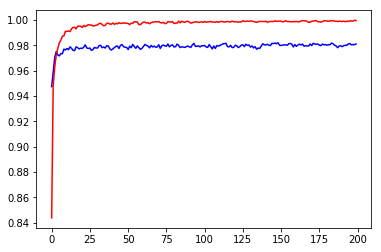

In [24]:
plt.plot(history.history['val_acc'],'b')
plt.plot(history.history['acc'],'r')

### Validation loss

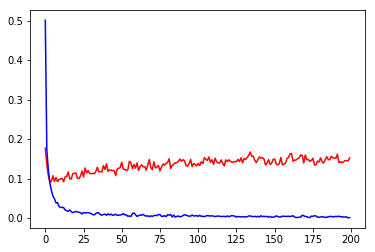

In [25]:
plt.plot(history.history['val_loss'],'r')
plt.plot(history.history['loss'],'b')

# 4. Model test on validation set (y_test)

WIll run it on X_test and result set would be validated against y_test

In [26]:
y_pred = np.round(m.predict(X_test)).astype('int64')
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# remove the categories from y_pred
# select the indix with the maximum probability
y_pred1 = np.argmax(y_pred,axis = 1)
y_pred1

array([4, 3, 2, ..., 3, 7, 1], dtype=int64)

In [28]:
# do the same for y_test
# select the index with the maximum probability
y_test1 = np.argmax(y_test,axis = 1)
y_test1

array([4, 3, 2, ..., 3, 7, 1], dtype=int64)

1    930
7    885
8    847
3    843
0    831
6    822
2    820
4    817
9    804
5    801
Name: label, dtype: int64


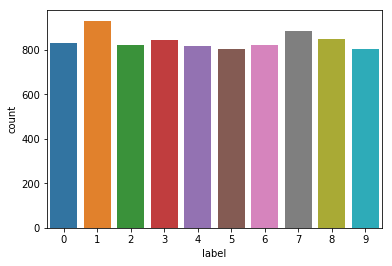

In [29]:
# print the frequency of each label

y = pd.DataFrame(y_pred1)
y.columns=['label']
print(y['label'].value_counts())

y[y['label'] < 0] = 0
y[y['label'] > 9] = 9

sns.countplot(y['label'])

In [30]:
print('Accuracy score for y_test: ', metrics.accuracy_score(y_test1,y_pred1))

Accuracy score for y_test:  0.9808333333333333


In [31]:
pd.DataFrame(metrics.confusion_matrix(y_test1,y_pred1))

,0,1,2,3,4,5,6,7,8,9
0,814,0,2,0,0,1,1,0,6,1
1,0,916,0,1,1,0,1,4,2,0
2,3,0,797,3,0,0,0,2,1,2
3,3,0,10,831,1,10,0,0,5,6
4,1,4,0,1,807,0,3,0,2,5
5,3,1,1,6,0,784,6,0,4,1
6,3,3,1,0,4,2,810,0,1,0
7,0,4,8,0,0,0,0,873,1,1
8,0,1,1,1,0,2,1,1,821,2
9,4,1,0,0,4,2,0,5,4,786


In [32]:
# combine actual and predicted in a single df
X_test['actual'] = y_test1
X_test['pred'] = y_pred1

In [33]:
X_test_err = X_test[X_test['actual'] != X_test['pred']]
X_test_err.shape

(161, 786)

Many predictions went wrong. Lets draw few of them. 

actual 5 ; predicted 6


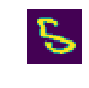

actual 7 ; predicted 2


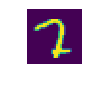

actual 7 ; predicted 2


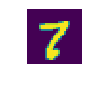

actual 3 ; predicted 5


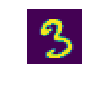

actual 9 ; predicted 1


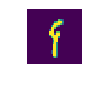

actual 4 ; predicted 9


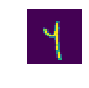

actual 9 ; predicted 0


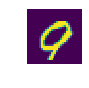

actual 1 ; predicted 7


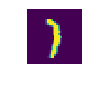

actual 3 ; predicted 0


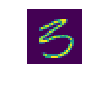

actual 3 ; predicted 2


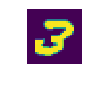

In [34]:
for i in range (10):
    act=X_test_err['actual'].values[i]
    prd=X_test_err['pred'].values[i]
    print("actual {0} ; predicted {1}".format(act,prd))
    plt.figure(figsize=(1,1))
    plt.imshow(X_test_err.drop(['actual','pred'], axis=1).values[i].reshape(28,28))
    plt.axis("off")
    plt.show()

Few of the images are easy but tricky. 

Model should be trained further with augmented images to achieve better accuracy

# 5. Final Submission

Finally, time to run model on required test set and sumbit the result on Kaggle

### Run on test data (df_test) and display few test images

In [48]:
# normalize the input data
df_test = df_test / 255

In [49]:
pred = m.predict(df_test)
pred

array([[4.0866291e-34, 3.0892675e-29, 1.0000000e+00, ..., 8.8787739e-28,
        1.0649112e-33, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 6.9289331e-25, ..., 8.0300410e-25,
        1.9311382e-34, 7.3570746e-23],
       [2.6295648e-14, 8.9741769e-15, 5.0680315e-13, ..., 1.7522428e-10,
        4.9397536e-10, 1.0000000e+00],
       ...,
       [0.0000000e+00, 1.7697534e-35, 5.9221966e-34, ..., 1.8334228e-25,
        5.0195982e-30, 5.0778208e-29],
       [2.6948345e-15, 1.4983328e-17, 5.5352846e-16, ..., 5.5346309e-12,
        1.3689507e-12, 1.0000000e+00],
       [1.8595029e-35, 2.4696586e-29, 1.0000000e+00, ..., 1.5547463e-27,
        9.8086150e-36, 0.0000000e+00]], dtype=float32)

In [50]:
# select the index with the maximum probability
pred = np.argmax(pred,axis = 1)
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

Display few images and their respective predicted labels

Prediction 2


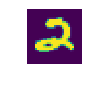

Prediction 0


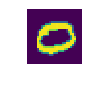

Prediction 9


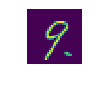

Prediction 9


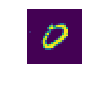

Prediction 3


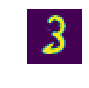

Prediction 7


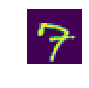

Prediction 0


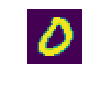

Prediction 3


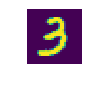

Prediction 0


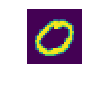

Prediction 3


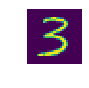

Prediction 5


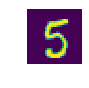

In [51]:

for i in range(11):  
    print('Prediction {0}'.format(pred[i]))
    plt.figure(figsize=(1,1))
    plt.imshow(df_test.values[i].reshape(28,28) )
    plt.axis('off')
    plt.show()


Model is doing a good job, but fails for distorted images. 

In [53]:
pred = pd.Series(pred,name="Label")

In [54]:
submit = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)

submit.to_csv("cnn_mnist_fewsteps_keras.csv",index=False)

Building models on personal computer has its own limitations. Like in this case, training with more epochs and using more custom parameters will eat into computer resources. I plan to run GridSearch with more customized parameters option on AWS cloud solution and let it take time that it needs.

I end this notebook here with leaving further scope of improvement to keras. Share your improvement ideas in comments. If you found this notebook helpful or you just liked it, some upvotes would be very much appreciated. It will keep me motivated :)

Thanks for visiting. 